
#  Bike Sharing Predictions in Washington D.C.

### Leandro Handal Baracatt 
#### MSc Management | MSc Business Analytics & Big Data	
#### <lhandalb@gmail.com>
  

#### Can you predict which water pumps are faulty?

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Required-Libraries" data-toc-modified-id="Load-Required-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Required Libraries</a></span></li><li><span><a href="#Import-and-Prepare-Data" data-toc-modified-id="Import-and-Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Merge-Train-/-Test-sets" data-toc-modified-id="Merge-Train-/-Test-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Merge Train / Test sets</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Preparation</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></li><li><span><a href="#Data-Cleaning-and-Feature-Engineering" data-toc-modified-id="Data-Cleaning-and-Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning and Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Code-for-Flag-creation-and-Column-Drop-and-Easy-imputations" data-toc-modified-id="Code-for-Flag-creation-and-Column-Drop-and-Easy-imputations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Code for Flag creation and Column Drop and Easy imputations</a></span></li><li><span><a href="#Lat/Long-imputation" data-toc-modified-id="Lat/Long-imputation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Lat/Long imputation</a></span></li><li><span><a href="#Dropping-duplicate-columns" data-toc-modified-id="Dropping-duplicate-columns-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Dropping duplicate columns</a></span></li><li><span><a href="#GPS-Height" data-toc-modified-id="GPS-Height-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>GPS Height</a></span></li><li><span><a href="#Population" data-toc-modified-id="Population-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Population</a></span></li><li><span><a href="#Parsinig-Dates" data-toc-modified-id="Parsinig-Dates-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Parsinig Dates</a></span></li><li><span><a href="#Dropping-Columns...-again" data-toc-modified-id="Dropping-Columns...-again-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Dropping Columns... again</a></span></li><li><span><a href="#Binning" data-toc-modified-id="Binning-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Binning</a></span></li><li><span><a href="#Code-for-High-Category-Variables" data-toc-modified-id="Code-for-High-Category-Variables-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Code for High Category Variables</a></span><ul class="toc-item"><li><span><a href="#Funder" data-toc-modified-id="Funder-4.9.1"><span class="toc-item-num">4.9.1&nbsp;&nbsp;</span>Funder</a></span></li><li><span><a href="#Installer" data-toc-modified-id="Installer-4.9.2"><span class="toc-item-num">4.9.2&nbsp;&nbsp;</span>Installer</a></span></li><li><span><a href="#WPT-Name" data-toc-modified-id="WPT-Name-4.9.3"><span class="toc-item-num">4.9.3&nbsp;&nbsp;</span>WPT Name</a></span></li><li><span><a href="#Subvillage" data-toc-modified-id="Subvillage-4.9.4"><span class="toc-item-num">4.9.4&nbsp;&nbsp;</span>Subvillage</a></span></li><li><span><a href="#Ward" data-toc-modified-id="Ward-4.9.5"><span class="toc-item-num">4.9.5&nbsp;&nbsp;</span>Ward</a></span></li></ul></li><li><span><a href="#Distance-to-Capital" data-toc-modified-id="Distance-to-Capital-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Distance to Capital</a></span></li><li><span><a href="#Final-Data-Quality-Check" data-toc-modified-id="Final-Data-Quality-Check-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Final Data Quality Check</a></span></li><li><span><a href="#Final-Data-Prep" data-toc-modified-id="Final-Data-Prep-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Final Data Prep</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Data-Prep-and-Libraries" data-toc-modified-id="Data-Prep-and-Libraries-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Prep and Libraries</a></span></li><li><span><a href="#Simple-Model---Logistic-Regression" data-toc-modified-id="Simple-Model---Logistic-Regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simple Model - Logistic Regression</a></span></li><li><span><a href="#Random-Forests-Classifier" data-toc-modified-id="Random-Forests-Classifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forests Classifier</a></span><ul class="toc-item"><li><span><a href="#Final-Model-(Full)" data-toc-modified-id="Final-Model-(Full)-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Final Model (Full)</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Classification-Report" data-toc-modified-id="Classification-Report-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Classification Report</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Final-Model-(Trimmed)" data-toc-modified-id="Final-Model-(Trimmed)-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>Final Model (Trimmed)</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Gradient-Booster-Classifier-(SKlearn)" data-toc-modified-id="Gradient-Booster-Classifier-(SKlearn)-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Gradient Booster Classifier (SKlearn)</a></span><ul class="toc-item"><li><span><a href="#Trimmed-Models" data-toc-modified-id="Trimmed-Models-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Trimmed Models</a></span></li></ul></li><li><span><a href="#ADABoost" data-toc-modified-id="ADABoost-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>ADABoost</a></span></li></ul></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predictions</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Full-model" data-toc-modified-id="Full-model-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Full model</a></span></li><li><span><a href="#Trimmed-Model-(less-features)" data-toc-modified-id="Trimmed-Model-(less-features)-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Trimmed Model (less features)</a></span></li></ul></li><li><span><a href="#Gradient-Booster-Classifier" data-toc-modified-id="Gradient-Booster-Classifier-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Gradient Booster Classifier</a></span><ul class="toc-item"><li><span><a href="#Trimmed-Models-(14-and-150-features)" data-toc-modified-id="Trimmed-Models-(14-and-150-features)-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Trimmed Models (14 and 150 features)</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

For this project we will try a Multi-class classification problem with 3 different classes.  
 - Functional
 - Non-Functional (Needs Repair)
 - Non-Functional

##  Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from skimage import io

## Import and Prepare Data 

We will download the data files from the competition website. This allows anyone to run the notebook and have the same results without needing to send the files as well

In [3]:
train_values_url = "http://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv"
train_values = pd.read_csv(train_values_url)
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


The data comes with the labels separate. So we import that as well and then we join it with the train dataset

In [4]:
train_labels_url = "http://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv"
train_labels = pd.read_csv(train_labels_url)
train_labels.head()


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


The test set will only be used to submit scores to the website

In [5]:
test_values_url = "http://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv"
test_values = pd.read_csv(test_values_url)
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### Merge Train / Test sets

We merge so any data preprocessing and feature engineering applies to both sets from the start

In [6]:
df = pd.concat([train_values,test_values])
df.shape

(74250, 40)

### Data Preparation

We start checking for Null Values, mistyped values and outliers

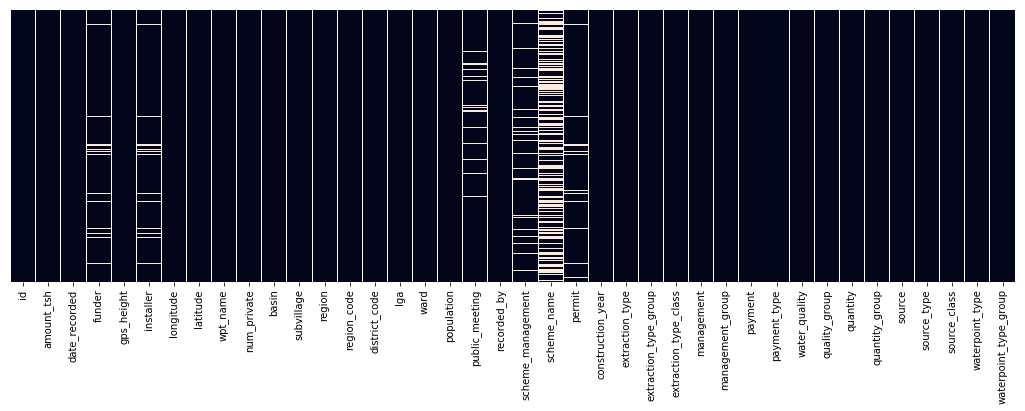

In [7]:
plt.subplots(figsize=(18,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

We can see from this heatmap that the data contains quite a few null values in different categories.

In [8]:
len(df.columns)  # We have 40 different columns 

40

In [9]:
(df.isnull().sum() > 0).sum()  # Columns that have Null Values

7

We want to then see all the columns that have Null values and what percentage of them are null

In [10]:
null_cols = (df.isnull().sum()/len(df))
null_val = pd.DataFrame({'Null Ratio': null_cols})
null_val.drop(null_val[null_val['Null Ratio'] == 0].index, inplace=True)
sorted_null_val = null_val.sort_values('Null Ratio', ascending=False).head(15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]), <a list of 6 Text yticklabel objects>)

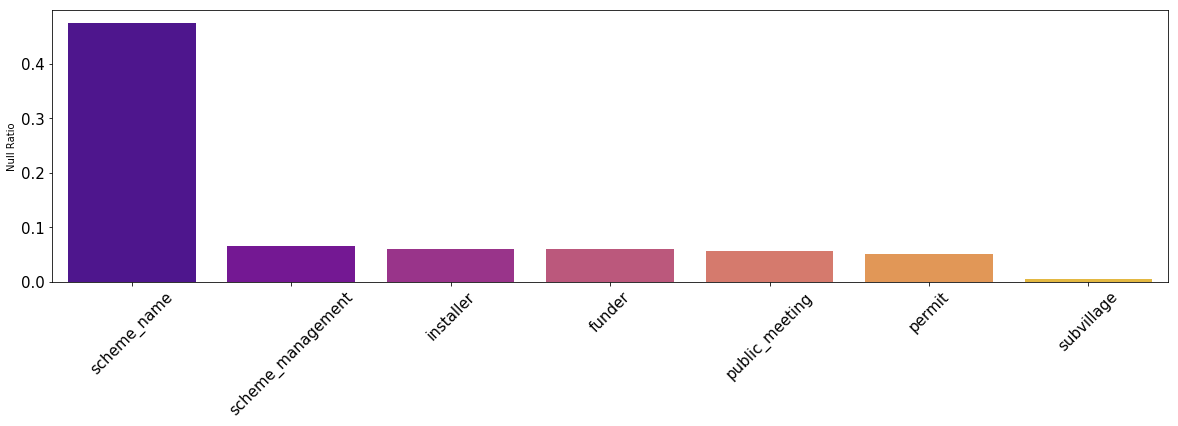

In [11]:
plt.subplots(figsize=(20,5))
sns.barplot(data=sorted_null_val, x=sorted_null_val.index, y='Null Ratio', palette='plasma')
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)

Scheme_name is by far the worst, but we have other null values as well.

We then proceed and check our label distribution and see if there is any inbalance we need to address

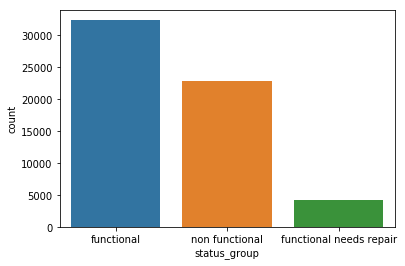

In [12]:
sns.countplot(x='status_group', data=train_labels)

In [13]:
train_labels.groupby('status_group').count()/len(train_labels)

,id
status_group,
functional,0.543081
functional needs repair,0.072677
non functional,0.384242


We can see that functional is the most common value and functional (needs repair) is the lowest one. As oversampling can be problematic, we will try everything first before resorting to under / over sampling

We then proceed to join the label with the rest of the set. We use an outer join so that all rows that have no label (test set) are then added as a null value (which will make it easy for us to separate them later on)

In [14]:
data = df.merge(train_labels, on='id', how='outer')

**We also check a couple of variables to see if there is anything that we need to take care off besodes those null values**

C:\Users\dagob\Anaconda3\envs\basicdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


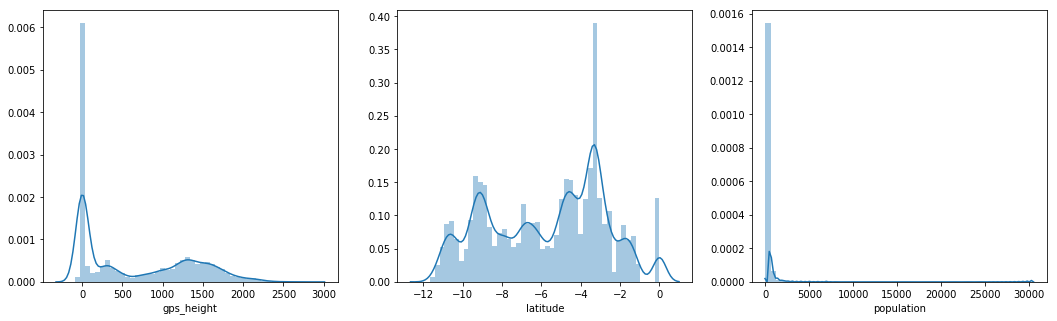

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(data['gps_height'], ax=ax[0])
sns.distplot(data['latitude'], ax=ax[1])
sns.distplot(data['population'], ax=ax[2])

This is very interesting. We can see a lot of values with gps_height being 0, same with latitude and population.  
First of all, tanzania doesn't cover latitude or longitude 0. The highest Tanzania gets to is around -1 Latitude and about 29 Longitude (minimum).  
This means that there are 0s in this dataset that are just a placeholder for what it would normally be a null value.  Same with the height and population

First we check if we have longitude 0 on null values per subvillage

In [16]:
print(data[data['latitude'] == 0]['id'].count(), " rows with latitude 0")
print(data[data['longitude'] == 0]['id'].count(), " rows with longitude 0")

0  rows with latitude 0
2269  rows with longitude 0


Well this makes no sense. We can clearly see on a map that there are values that are in latitude 0

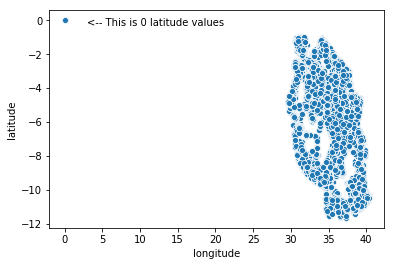

In [17]:
sns.scatterplot(data=data, x='longitude', y='latitude')
plt.annotate("<-- This is 0 latitude values", xy=(3, -0.3));

In [18]:
data['latitude'].describe()

count    7.425000e+04
mean    -5.701771e+00
std      2.944969e+00
min     -1.164944e+01
25%     -8.525675e+00
50%     -5.026540e+00
75%     -3.325058e+00
max     -2.000000e-08
Name: latitude, dtype: float64

This solves our problem. The issue is that the rows with 0 latitude are recorded as -2e-8 latitude

In [19]:
print(data[data['latitude'] == -2e-8]['id'].count(), " rows with latitude 0")
print(data[data['longitude'] == 0]['id'].count(), " rows with longitude 0")

2269  rows with latitude 0
2269  rows with longitude 0


Now we have fgound our "null" coordinates

**This means that we will have to study the different features and see which ones have 0's that mean null value and don't mean 0**

We also quickly check the different categories against time to see if it makes sense to go through thetrouble of parsing the dates

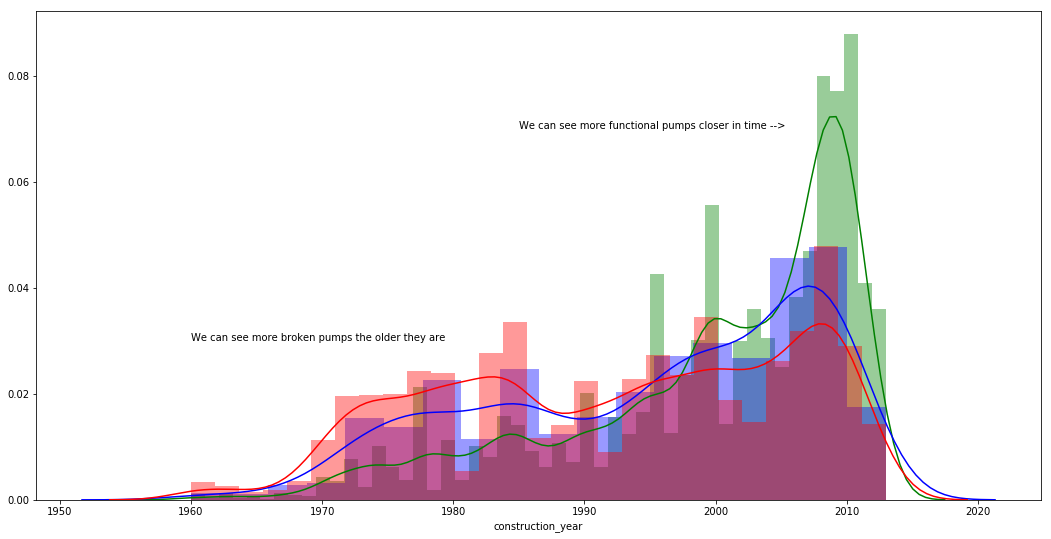

In [20]:
plt.subplots(figsize=(18,9))
sns.distplot(data.loc[(data.construction_year != 0) & (data.status_group == 'functional'), 'construction_year'], color='green', label='Functional')
sns.distplot(data.loc[(data.construction_year != 0) & (data.status_group == 'functional needs repair'), 'construction_year'], color='blue', label='Functional Needs Repair')
sns.distplot(data.loc[(data.construction_year != 0) & (data.status_group == 'non functional'), 'construction_year'], color='red', label='Non Functional')
plt.annotate("We can see more functional pumps closer in time -->", xy=(1985, 0.07))
plt.annotate("We can see more broken pumps the older they are ", xy=(1960, 0.03));

So we can conclude that we should definitely work the datetime into useful information 

## Exploratory Data Analysis

### Data Description


amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint


### Data Visualization

First of all we will visualize the data in a map created in Carto. This map allows us to see the different Water Pumps of Tanzania filtered by status.

**Note: This next cell and the Tableau one need to be run for them to appear as they connect to external resources**

In [1]:

from IPython.display import HTML
HTML('<iframe width="100%" height="520" frameborder="0" src="https://alejotp25.carto.com/builder/e130af89-1f02-428c-8c90-ed73677b2de6/embed" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

From this geographical visualization we can appreciate that location could be a good factor on determining if a specific water pump is functional or not. 

In [173]:
print("Train data rows, columns:",train_values.shape)
print("Train data labels:",len(train_labels))

Train data rows, columns: (59400, 40)
Train data labels: 59400


In [175]:
# Merge data and labels together in one dataframe.
merged = pd.merge(train_values, train_labels, on='id')

In [177]:
#Visualize the id's of the table
print(merged.shape)
merged.head(5)

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [178]:
#Understand the different data types od data
merged.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

C:\Users\dagob\Anaconda3\envs\basicdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


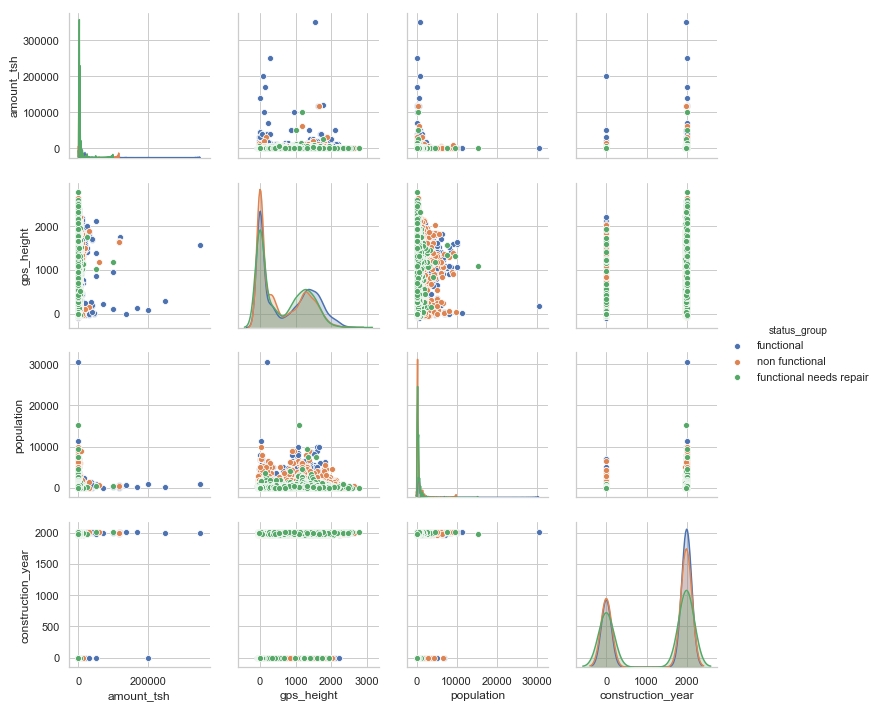

In [179]:
# Pairwise plots
sns.set(style='whitegrid',context='notebook')
cols=['amount_tsh','gps_height','population','construction_year','status_group']
sns.pairplot(merged[cols],height=2.5, hue='status_group')
plt.show()

From this analysis we can conclude that the waterpumps with a high amount of water available to waterpoint (high ampunt_tsh) are normally functioning. 

We can also infer that the construction year has no clear relationship with the actual status of the waterpump.  

Now we will try to understand better the data provided by creating some functions:

In [180]:
def unique_categories(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(column, len(df[column].unique()))
            
def all_uniques(df):
    for column in df.columns:
        print(column, len(df[column].unique()))

def remove_features(df, extra_columns=None):
    df.drop(['id', 'num_private', 'recorded_by'], axis=1, inplace=True)
    if extra_columns:
        df.drop(extra_columns, axis=1, inplace=True)
    return df

In [181]:
all_uniques(merged)

id 59400
amount_tsh 98
date_recorded 356
funder 1898
gps_height 2428
installer 2146
longitude 57516
latitude 57517
wpt_name 37400
num_private 65
basin 9
subvillage 19288
region 21
region_code 27
district_code 20
lga 125
ward 2092
population 1049
public_meeting 3
recorded_by 1
scheme_management 13
scheme_name 2697
permit 3
construction_year 55
extraction_type 18
extraction_type_group 13
extraction_type_class 7
management 12
management_group 5
payment 7
payment_type 7
water_quality 8
quality_group 6
quantity 5
quantity_group 5
source 10
source_type 7
source_class 3
waterpoint_type 7
waterpoint_type_group 6
status_group 3


We can see some categories that have a lot of different categories. Those will need to be addressed. 

In [184]:
df = train_values.copy()

In [185]:
num_funders = len(df.funder.unique())
print('There are', '{:d}'.format(num_funders), 'different funders.')

There are 1898 different funders.


In [186]:
num_installers = len(df.installer.unique())
print('There are', '{:d}'.format(num_installers), 'different installers.')

There are 2146 different installers.


In [187]:
num_checkers = len(df.recorded_by.unique())
print('There are', '{:d}'.format(num_checkers), 'checkers.')

There are 1 checkers.


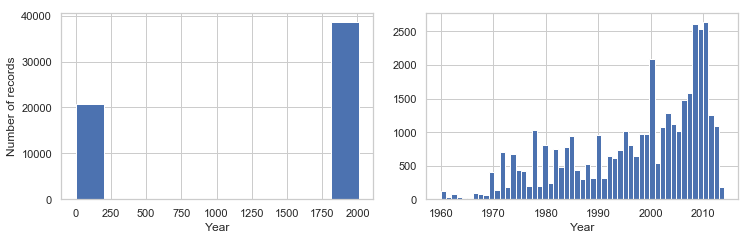

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(10.6, 3.5))
ax[0].hist(df.construction_year)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of records')
ax[1].hist(df.construction_year[df.construction_year > 0], bins=53, range=[1960, 2014])
ax[1].set_xlabel('Year')

plt.tight_layout()

## Data Cleaning and Feature Engineering

We plot our null value heatmap to remind us of where the null values reside

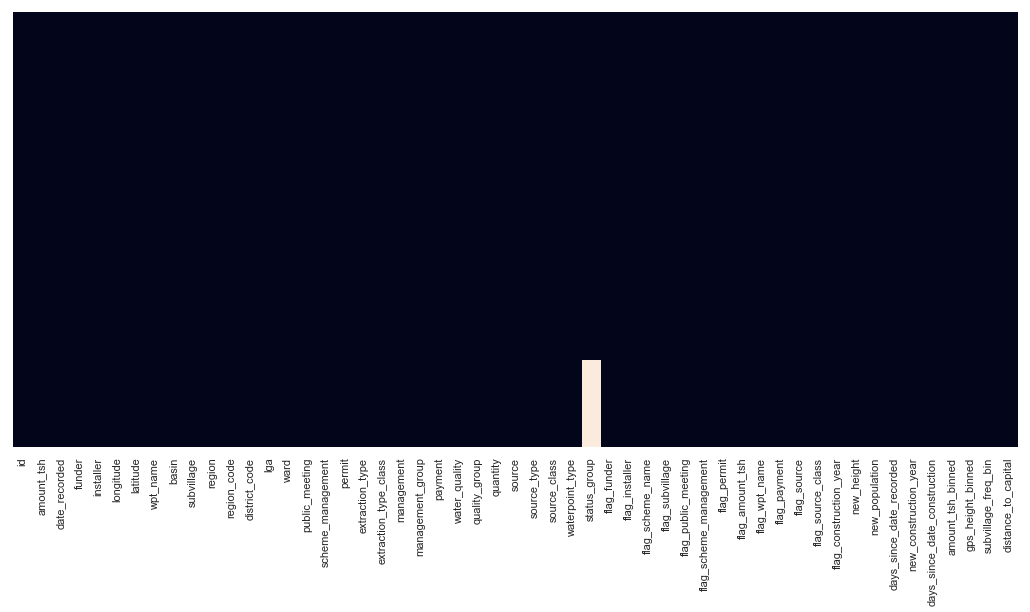

In [189]:
plt.subplots(figsize=(18,8))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

The first thing we need to do is create flag features that show where either some values were null or modified in case those carry any kind of information

### Code for Flag creation and Column Drop and Easy imputations

After reviewing the different features and what they mean, we decided on the following code to create flags (to then impute or drop columns)

In [23]:
flag_cols = ['amount_tsh', 'funder', 'installer', 'wpt_name', 'scheme_name', 'payment', 'source', 'source_class']

The values for the flag creation are:  
amount_tsh: 0  
funder: null  
installer: null  
wpt_name: 'none'  
scheme_name: null  
payment: 'unknown'  
source: 'unknown'  
source_class: 'unknown'

In [24]:
# Null Value Flags
data["flag_funder"] = data['funder'].apply(lambda x: True if pd.isnull(x) else False)
data["flag_installer"] = data['installer'].apply(lambda x: True if pd.isnull(x) else False)
data["flag_scheme_name"] = data['scheme_name'].apply(lambda x: True if pd.isnull(x) else False)
data["flag_subvillage"] = data['subvillage'].apply(lambda x: True if pd.isnull(x) else False)
data["flag_public_meeting"] = data['public_meeting'].apply(lambda x: True if pd.isnull(x) else False)
data["flag_scheme_management"] = data['scheme_management'].apply(lambda x: True if pd.isnull(x) else False)
data["flag_permit"] = data['permit'].apply(lambda x: True if pd.isnull(x) else False)

# Flags for values at 0, none, or unknown
data["flag_amount_tsh"] = data['amount_tsh'].apply(lambda x: True if x == 0 else False)
data["flag_wpt_name"] = data['wpt_name'].apply(lambda x: True if x == 'none' else False)
data["flag_payment"] = data['payment'].apply(lambda x: True if x == 'unknown' else False)
data["flag_source"] = data['source'].apply(lambda x: True if x == 'unknown' else False)
data["flag_source_class"] = data['source_class'].apply(lambda x: True if x == 'unknown' else False)
data['flag_construction_year'] = data['construction_year'].apply(lambda x: True if x == 0 else False)

In [25]:
# Data Imputation (Simple ones)
data['subvillage'] = data['subvillage'].apply(lambda x: 'Other' if pd.isnull(x) else x)
data['installer'] = data['installer'].apply(lambda x: 'Other' if pd.isnull(x) else x)
data['public_meeting'] = data['public_meeting'].apply(lambda x: True if pd.isnull(x) else x)
data['scheme_management'] = data['scheme_management'].apply(lambda x: 'Other' if pd.isnull(x) else x)
data['permit'] = data['permit'].apply(lambda x: True if pd.isnull(x) else x)
data['funder'] = data['funder'].apply(lambda x: 'Other' if pd.isnull(x) else x)

In [26]:
flagged_cols = [col for col in data.columns if 'flag' in col]

In [27]:
data[flagged_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 74249
Data columns (total 13 columns):
flag_funder               74250 non-null bool
flag_installer            74250 non-null bool
flag_scheme_name          74250 non-null bool
flag_subvillage           74250 non-null bool
flag_public_meeting       74250 non-null bool
flag_scheme_management    74250 non-null bool
flag_permit               74250 non-null bool
flag_amount_tsh           74250 non-null bool
flag_wpt_name             74250 non-null bool
flag_payment              74250 non-null bool
flag_source               74250 non-null bool
flag_source_class         74250 non-null bool
flag_construction_year    74250 non-null bool
dtypes: bool(13)
memory usage: 1.5 MB


Here we check that all our flag values have 2 values (True, False)

In [28]:
for col in flagged_cols:
    print(col, ": ", data[col].nunique())  # Careful with any non-2 

flag_funder :  2
flag_installer :  2
flag_scheme_name :  2
flag_subvillage :  2
flag_public_meeting :  2
flag_scheme_management :  2
flag_permit :  2
flag_amount_tsh :  2
flag_wpt_name :  2
flag_payment :  2
flag_source :  2
flag_source_class :  2
flag_construction_year :  2


### Lat/Long imputation 

As we saw earlier, we saw that many rows had 0 as their value for latitude and longitude which is outside of Tanzania. So we need to impute a value for these. We know they are more than 2k rows. 

Text(-0.2,2600,'Null Values')

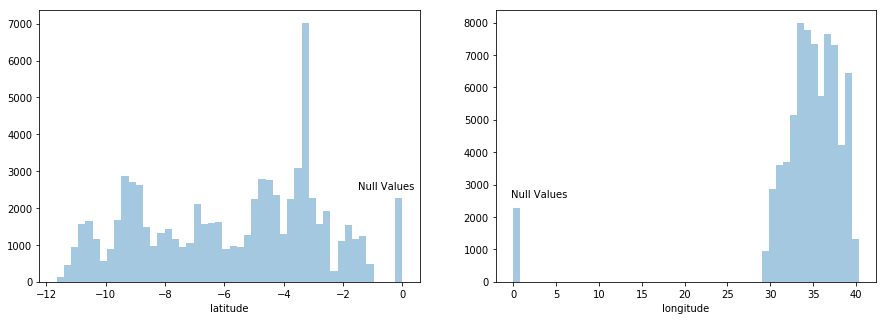

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data['latitude'], kde=False, ax=ax[0])
sns.distplot(data['longitude'], kde=False, ax = ax[1])
ax[0].annotate('Null Values', xy=(-1.5,2500))
ax[1].annotate('Null Values', xy=(-0.2,2600))

In [30]:
data[data['latitude'] == -2e-8]['longitude'].describe()

count    2269.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: longitude, dtype: float64

Both latitude and Longitude have 2269 rows and we saw that every longitude was 0 when latitude was 0. Those are our "null values" as there is no 0 latitude or longitude inside of Tanzania 

In [31]:
data[data['latitude'] != -2e-8].describe()['latitude']['max'] #Max non-null Lat

-0.99846435

In [32]:
data[data['longitude'] != 0].describe()['longitude']['min']

29.6071219

We'll set those 0s and -2e-8 to np.nan values so that we can take averages without taking them into account.

In [33]:
data.loc[data['latitude'] == -2e-8, 'latitude'] = np.nan
data.loc[data['longitude'] == 0, 'longitude'] = np.nan

In [34]:
data.isna().sum()[['latitude', 'longitude']]

latitude     2269
longitude    2269
dtype: int64

**Imputing Strategy:**
For several null values set as 0, we need to come up with an imputation strategy. In this case, we know that in terms of size we have:
subvillage < ward < lga < region. What we plan to do is grab the averages of every area type and then impute from smaller to bigger region until the number is not 0. 
Example, if row 123 has lat/long 0 we impute the average of its subvillage, if that one is 0, the mean of the ward, then lge and finally region. 
This should ensure that we have no latitude and longitude at 0 or as few as possible.

This same strategy can be used for any other attribute of locations like population, gps_height, etc

In [35]:
#Lat Long by Zone
coord_subv = data.groupby('subvillage').mean()[['latitude', 'longitude']]
coor_ward = data.groupby('ward').mean()[['latitude', 'longitude']]
coor_lga = data.groupby('lga').mean()[['latitude', 'longitude']]
coor_region = data.groupby('region').mean()[['latitude', 'longitude']]

In [36]:
def latitude_imputer(data):
    lat = data['latitude']
    if np.isnan(lat):
        new_lat = coord_subv.loc[data['subvillage'], 'latitude']
        if np.isnan(new_lat):
            new_lat = coor_ward.loc[data['ward'], 'latitude']
            if np.isnan(new_lat):
                new_lat = coor_lga.loc[data['lga'], 'latitude']
                if np.isnan(new_lat):
                    new_lat = coor_region.loc[data['region'], 'latitude']
        return new_lat
    return lat

def longitude_imputer(data):
    long = data['longitude']
    if np.isnan(long):
        new_long = coord_subv.loc[data['subvillage'], 'longitude']
        if np.isnan(new_long):
            new_long = coor_ward.loc[data['ward'], 'longitude']
            if np.isnan(new_long):
                new_long = coor_lga.loc[data['lga'], 'longitude']
                if np.isnan(new_long):
                    new_long = coor_region.loc[data['region'], 'longitude']
        return new_long
    return long

In [37]:
data['latitude'] = data.apply(latitude_imputer, axis=1)
data['longitude'] = data.apply(longitude_imputer, axis=1)

We then check the distribution to make sure that we don't have any values at 0 and that we fixed the issue 

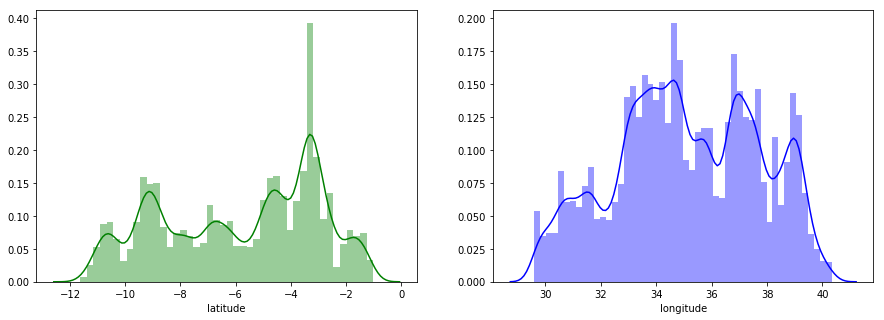

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['latitude'], color='green', ax=ax[0])
sns.distplot(data['longitude'], color='blue', ax=ax[1])

All latitude and longitude values are within the limits of Tanzania. So the imputation worked fine 

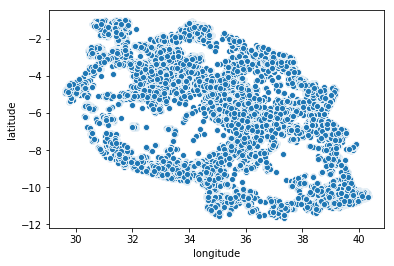

In [39]:
sns.scatterplot(data=data, x='longitude', y='latitude');  # We don't see those dots at (0,0) anymore

Kind of looks like Tanzania

### Dropping duplicate columns 

We saw some features were almost an exact copy of other features. So we drop them. Others have too many null values "Scheme Name"

In [40]:
drop_cols = ['num_private', 'recorded_by', 'scheme_name', 'extraction_type_group', 'payment_type', 'quantity_group', 'waterpoint_type_group']

In [41]:
data.drop(labels=drop_cols, axis=1, inplace=True)

In [42]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'status_group', 'flag_funder', 'flag_installer', 'flag_scheme_name',
       'flag_subvillage', 'flag_public_meeting', 'flag_scheme_management',
       'flag_permit', 'flag_amount_tsh', 'flag_wpt_name', 'flag_payment',
       'flag_source', 'flag_source_class', 'flag_construction_year'],
      dtype='object')

### GPS Height

Following the same logic, there seems to be too many values at 0 for gps_height. The difference is that in this case we don't know if all of them are null values 

Text(150,0.004,'<- Could be Null Values')

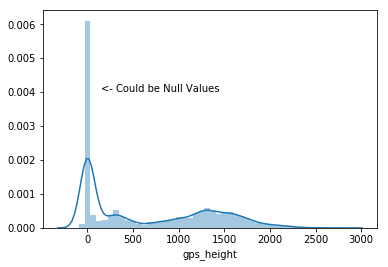

In [43]:
sns.distplot(data['gps_height'])
plt.annotate("<- Could be Null Values", xy=(150, 0.004))

We provide the same imputation strategy, but as we don't know if there aren't some real 0s in the data, we decide to leave them for the averaging. This should give a good middle ground between leaving them all at 0, and completely imputing them without taking them into account 

In [44]:
# GPS_height
height_subv = data.groupby('subvillage').mean()[['gps_height']]
height_ward = data.groupby('ward').mean()[['gps_height']]
height_lga = data.groupby('lga').mean()[['gps_height']]
height_region = data.groupby('region').mean()[['gps_height']]

In [45]:
def height_imputer(data):
    height = data['gps_height']
    if height == 0:
        new_height = height_subv.loc[data['subvillage'], 'gps_height']
        if new_height == 0:
            new_height = height_ward.loc[data['ward'], 'gps_height']
            if new_height == 0:
                new_height = height_lga.loc[data['lga'], 'gps_height']
                if new_height == 0:
                    new_height = height_region.loc[data['region'], 'gps_height']
        return new_height
    return height

In [46]:
data['new_height'] = data.apply(height_imputer, axis=1)

The following tables were created and embeded in Tableau using the new height and lat/long data. We have static versions as well in case there is a problem 

**Note: This next cell needs to be run for it to appear**

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1552057061009' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;wa&#47;waterpumps&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='waterpumps&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;wa&#47;waterpumps&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1552057061009');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='527px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

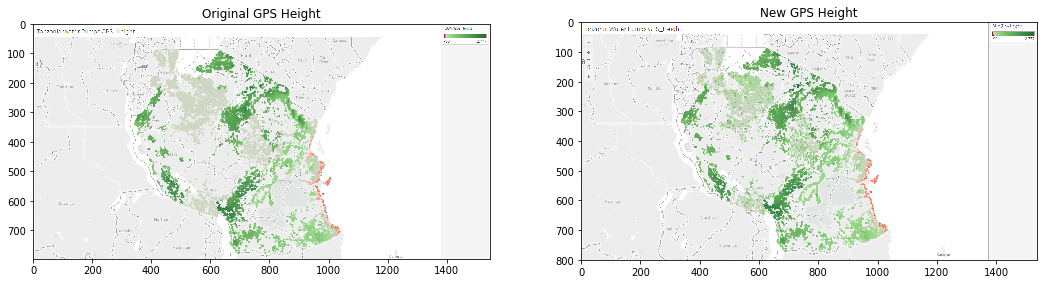

In [48]:
# These are backup images of the previous graph
plt.subplots(figsize=(18,8))
image1 = io.imread('https://s3.amazonaws.com/mbdo2ml2/Original_gps_height.png')
image2 = io.imread('https://s3.amazonaws.com/mbdo2ml2/new_gps_height.png')
plt.subplot(1,2,1)
plt.imshow(image1)
plt.title("Original GPS Height")
plt.subplot(1,2,2)
plt.imshow(image2)
plt.title("New GPS Height");

In [49]:
data['height_diff'] = data['new_height'] - data['gps_height']

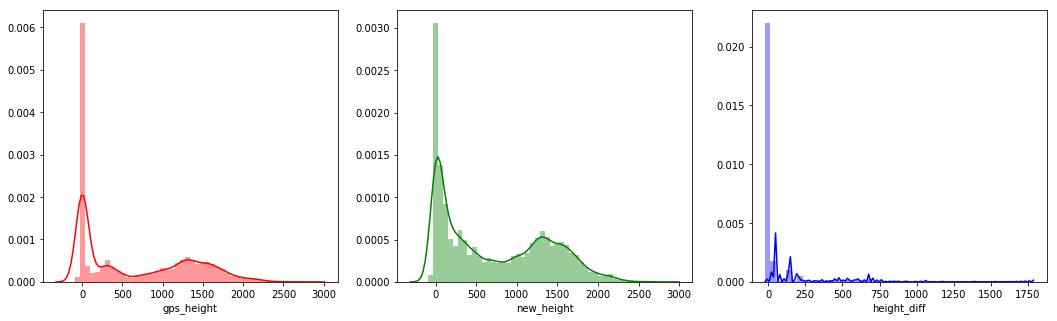

In [50]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
sns.distplot(data['gps_height'], color='red', ax=ax[0])
sns.distplot(data['new_height'], color='green', ax=ax[1])
sns.distplot(data['height_diff'], color='blue', ax=ax[2])

As we see we still hve some 0s. We will use both features to test models.

### Population

We also need to check population, as there seems to be some places with 0 but that is unlikely (ghost villages?)

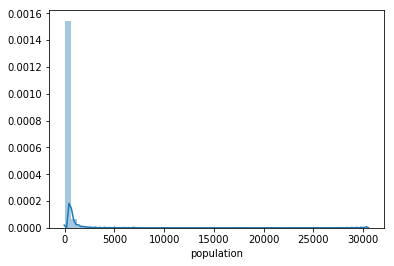

In [51]:
sns.distplot(data['population'])

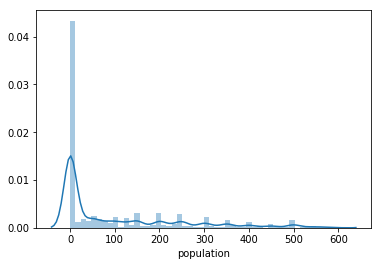

In [52]:
sns.distplot(data.loc[data['population'] < 600, 'population'])

In [53]:
data[data['population'] == 0].count()['id']

26834

We can see a lot of population being 0 and it doesn't really make much sense that they are. At the same time, averaging every population as 0 might also bring some troubles as we might be imputing a population to abandoned water pumps. In this case we will average but actually taking into consideration the 0s like we did for gps_height 

In [54]:
# Population  by Zone
pop_subv = data.groupby('subvillage').mean()[['population']]
pop_ward = data.groupby('ward').mean()[['population']]
pop_lga = data.groupby('lga').mean()[['population']]
pop_region = data.groupby('region').mean()[['population']]

In [55]:
print("0 Pop Subv: ", (pop_subv['population'] == 0).sum())
print("0 Pop ward: ", (pop_ward['population'] == 0).sum())
print("0 Pop lga: ", (pop_lga['population'] == 0).sum())
print("0 Pop region: ", (pop_region['population'] == 0).sum())

0 Pop Subv:  8107
0 Pop ward:  782
0 Pop lga:  42
0 Pop region:  4


In [56]:
data.loc[data['region'] == 'Dodoma', ['subvillage', 'ward', 'lga', 'population']].nunique()

subvillage    789
ward          127
lga             6
population      1
dtype: int64

We have 789 subvillages, 127 wards, 6 lgas in the Dodoma region with 0 population after averaging. So we will impute a new population to test out 

In [57]:
def population_imputer(data):
    population = data['population']
    if population == 0:
        new_population = pop_subv.loc[data['subvillage'], 'population']
        if new_population == 0:
            new_population = pop_ward.loc[data['ward'], 'population']
            if new_population == 0:
                new_population = pop_lga.loc[data['lga'], 'population']
                if new_population == 0:
                    new_population = pop_region.loc[data['region'], 'population']
        return new_population
    return population

In [58]:
data['new_population'] = data.apply(population_imputer, axis=1)

Chekcing our new imputations against the old ones.

In [59]:
corrmap = data[['gps_height', 'new_height', 'population', 'new_population']].corr()

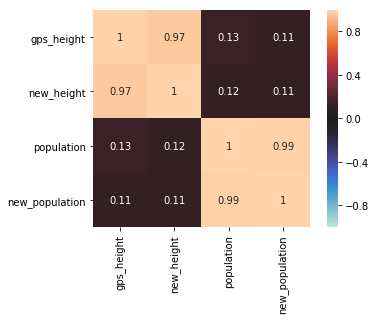

In [60]:
sns.heatmap(corrmap, vmin=-1, vmax=1, center=0, square=True, annot=True)

We have almost perfect correlation between the old and the new values for both gps height and population. Which could be good meaning that we didn't change that much the general data. But at the same time it could mean that we just wasted our time 

### Parsinig Dates

We knew from the previous experiment that we need to check the time data and find any useful information If possible

First we check if there are any null values or "wrong values" like 0. 

In [61]:
data['construction_year'].isnull().any()  # No null values

False

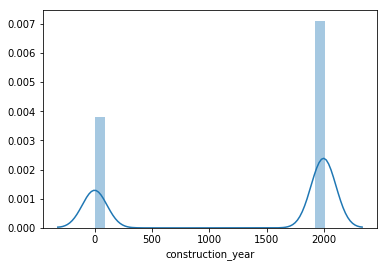

In [62]:
sns.distplot(data['construction_year'])

In [63]:
data[(data['date_recorded'] == 0)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,flag_permit,flag_amount_tsh,flag_wpt_name,flag_payment,flag_source,flag_source_class,flag_construction_year,new_height,height_diff,new_population


So we have a considerable ammount of pumps with no construction year, but every pump has a date of last record.

In [64]:
x = pd.to_datetime(data["date_recorded"], format="%Y-%m-%d")
x.describe()

count                   74250
unique                    369
top       2011-03-17 00:00:00
freq                      695
first     2001-03-26 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

We can also see that that the max and min are within logical ranges. So we can use this as a strategy to impute those values that have 0 as their construction year.  
Also, as we know there are no pumps that were created at year 0, we will remove them to keep them from messing with the averages

In [65]:
data.loc[data['construction_year'] == 0, 'construction_year'] = np.nan

In [66]:
# Construction Year by Zone
year_subv = data.groupby('subvillage').mean()[['construction_year']]
year_ward = data.groupby('ward').mean()[['construction_year']]
year_lga = data.groupby('lga').mean()[['construction_year']]
year_region = data.groupby('region').mean()[['construction_year']]

In [67]:
print("0 as Year constructed")
print('Subvillage: ',(year_subv.isnull()).any())
print('Ward: ',(year_ward.isnull()).any())
print('LGA: ',(year_lga.isnull()).any())
print('Region: ',(year_region.isnull()).any())

0 as Year constructed
Subvillage:  construction_year    True
dtype: bool
Ward:  construction_year    True
dtype: bool
LGA:  construction_year    True
dtype: bool
Region:  construction_year    True
dtype: bool


All levels of resolution have entire zones (in this case up to regions with 0 as constructed year) We need a different strategy

**Impute Strategy:**

We can create a flag that the construction year was 0, and then as we always have a date last recorded. We can then try to find a relationship and use it.  

In [68]:
data["flag_construction_year"] = data['construction_year'].apply(lambda x: True if pd.isnull(x) else False)

In [69]:
data["time_difference"] = pd.to_datetime(data["date_recorded"], format="%Y-%m-%d").dt.year - data['construction_year']

# Convert date_recorded to datetime and find number of days
data["date_recorded"] = pd.to_datetime(data["date_recorded"], format="%Y-%m-%d")
data["days_since_date_recorded"] = (pd.datetime.today() - data["date_recorded"]).dt.days

Text(15,0.07,'<- Median')

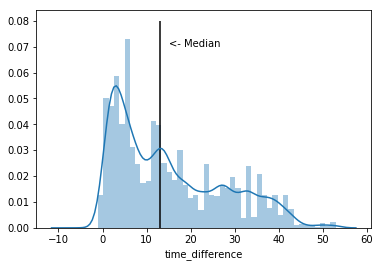

In [70]:
sns.distplot(data[data['construction_year'].notnull() ]['time_difference'])
plt.vlines(data[data['construction_year'].notnull()]['time_difference'].median(),0,0.08)
plt.annotate("<- Median", xy=(15,0.07))

We could impute the median to every pump with a construction year set at 0. But as they are a considerable ammount, maybe a hybrid approach is better.  
We could impute averages based on region, and any remaining 0s after that we could do with the global median

In [71]:
global_median = data[data['construction_year'].notnull()]['time_difference'].median()
global_median

13.0

In [72]:
def year_imputer(data):
    const_year = data['construction_year']
    if pd.isnull(const_year):
        new_const_year = year_subv.loc[data['subvillage'], 'construction_year']
        if pd.isnull(new_const_year):
            new_const_year = year_ward.loc[data['ward'], 'construction_year']
            if pd.isnull(new_const_year):
                new_const_year = year_lga.loc[data['lga'], 'construction_year']
                if pd.isnull(new_const_year):
                    new_const_year = year_region.loc[data['region'], 'construction_year']
        return new_const_year
    return const_year

In [73]:
data['new_construction_year'] = data.apply(year_imputer, axis=1)

In [74]:
(data['construction_year'].isnull()).sum()

25969

In [75]:
(data['new_construction_year'].isnull()).sum()

10356

We imputed more than half, the rest will be done by simply suibstracting the global median (13) from the year of the last data recorded

In [76]:
def final_year(data):
    c_year = data['new_construction_year']
    if pd.isnull(c_year):
        return data['date_recorded'].year - global_median
    else:
        return c_year

In [77]:
data['new_construction_year'] = data.apply(final_year, axis=1)

In [78]:
data['new_construction_year'].isnull().any()

False

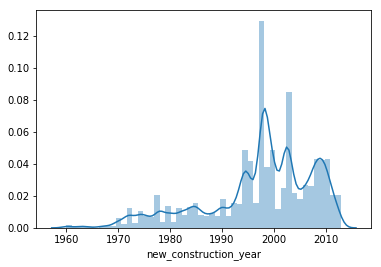

In [79]:
sns.distplot(data['new_construction_year'])

We have all our pumps having a better time indication. starting around the 1950s until recently 

In [80]:
# Convert find days between construction_year
data["days_since_date_construction"] = (int(pd.datetime.today().year)-data["new_construction_year"])*365
data.loc[data['new_construction_year'] == 0, 'days_since_date_construction'] = 0



### Dropping Columns... again

During our processing, we've been accumulating alternate features. We need to drop the original ones

In [81]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'status_group', 'flag_funder', 'flag_installer', 'flag_scheme_name',
       'flag_subvillage', 'flag_public_meeting', 'flag_scheme_management',
       'flag_permit', 'flag_amount_tsh', 'flag_wpt_name', 'flag_payment',
       'flag_source', 'flag_source_class', 'flag_construction_year',
       'new_height', 'height_diff', 'new_population', 'time_difference',
       'days_since_date_recorded', 'new_construction_year',
       'days_since_date_construction'],
      dtype='o

In [82]:
cols = ['gps_height', 'population', 'construction_year', 'time_difference', 'height_diff']

In [83]:
data.drop(cols, axis=1, inplace=True)

### Binning

Some features might have some benefit by binning them. So we proceed with those numerical values (and some categorical) that can be remapped

In [84]:
data[data['amount_tsh'] > 0]['amount_tsh'].describe()

count     22201.000000
mean       1065.826474
std        5240.480449
min           0.200000
25%          50.000000
50%         250.000000
75%        1000.000000
max      350000.000000
Name: amount_tsh, dtype: float64

We start by binning the amount_tsh

In [85]:
amount_tsh_binned = pd.DataFrame(np.zeros((data.shape[0],1)), columns=['amount_tsh_binned'])
amount_tsh_binned[data.amount_tsh <= 0] = 'empty'
amount_tsh_binned[(data.amount_tsh > 0) & (data.amount_tsh <= 200) ] = 'low'
amount_tsh_binned[(data.amount_tsh > 200) & (data.amount_tsh <= 1500) ] = 'med'
amount_tsh_binned[data.amount_tsh > 1500] = 'high'                 
amount_tsh_binned = amount_tsh_binned.to_sparse()
data['amount_tsh_binned'] = amount_tsh_binned

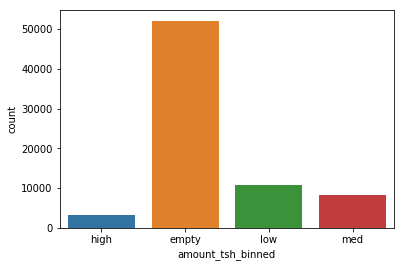

In [86]:
sns.countplot(data['amount_tsh_binned']);

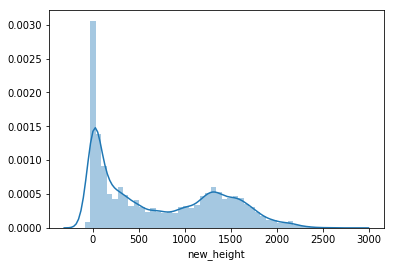

In [87]:
sns.distplot(data['new_height']);

In [88]:
gps_height_binned = pd.DataFrame(np.zeros((data.shape[0],1)), columns=['gps_height_binned'])
gps_height_binned[data.new_height < -10] = 'below_sea_level'
gps_height_binned[(data.new_height >= -10) & (data.new_height <= 10) ] = 'sea_level'
gps_height_binned[data.new_height > 10] = 'above_sea_level'                 
gps_height_binned = gps_height_binned.to_sparse()
data['gps_height_binned'] = gps_height_binned

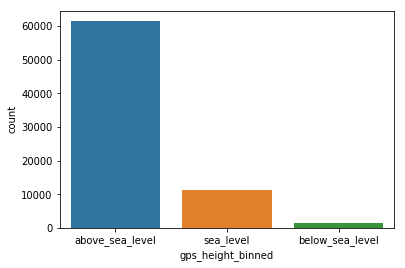

In [89]:
sns.countplot(data['gps_height_binned']);

In [90]:
subv = data.groupby('subvillage').count()['id'].sort_values(ascending=False)

In [91]:
subv_unique = list(subv[subv==1].index)
subv_verylow = list(subv[(subv>1) & (subv<5)].index)
subv_low = list(subv[(subv>=5) & (subv<10)].index)
subv_medium = list(subv[(subv>=10) & (subv<100)].index)
subv_high = list(subv[(subv>=100) & (subv<300)].index)
subv_veryhigh = list(subv[subv>=300].index)

In [92]:
subvillage_freq_bin = pd.DataFrame(np.zeros((data.shape[0],1)), columns=['subvillage_freq_bin'])
subvillage_freq_bin[data.subvillage.isin(subv_unique)] = 'unique'
subvillage_freq_bin[data.subvillage.isin(subv_verylow)] = 'very_low'
subvillage_freq_bin[data.subvillage.isin(subv_low)] = 'low'
subvillage_freq_bin[data.subvillage.isin(subv_medium)] = 'medium'
subvillage_freq_bin[data.subvillage.isin(subv_high)] = 'high' 
subvillage_freq_bin[data.subvillage.isin(subv_veryhigh)] = 'very_high'
subvillage_freq_bin[data.subvillage == 'Other'] = 'unique'
subvillage_freq_bin = subvillage_freq_bin.to_sparse()
data['subvillage_freq_bin'] = subvillage_freq_bin

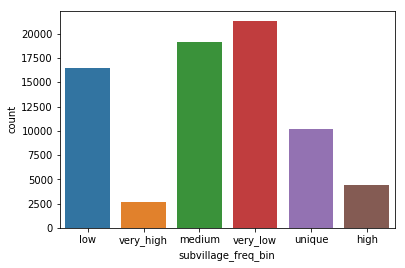

In [93]:
sns.countplot(data.subvillage_freq_bin)

### Code for High Category Variables

We need to check features that have so many categories and then we need to see wether we can bin them or drop them.  
Reason behind it is that the model will grow too much if we leave to many categories in the data (each becomes a feature when pivoted)

In [94]:
cat_cols = []
high_cat = []
for col in data.columns:
    if data[col].dtype == 'O':
        cat_cols.append(col)
        if data[col].nunique() > 1000:
            high_cat.append(col)

In [95]:
for col in high_cat:
    print(col, ": ", data[col].nunique())

funder :  2141
installer :  2411
wpt_name :  45684
subvillage :  21426
ward :  2098


Now we check if the distribution per category and then decide wether to bin the rest as other or drop the column 

#### Funder

We create a countplot and select the most popular X features and then we keep those as they are, and the rest as "Other"

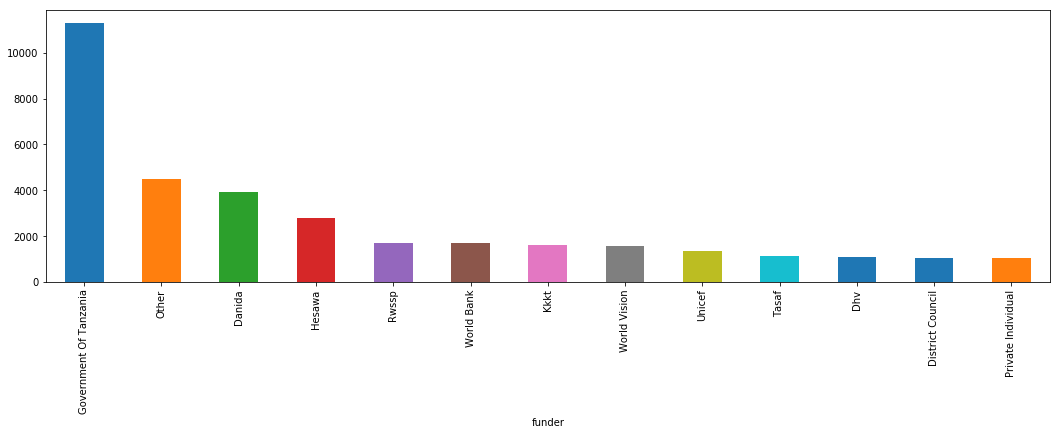

In [96]:
plt.subplots(figsize=(18,5))
data.groupby('funder').count()['id'].sort_values(ascending=False)[:13].plot.bar()
funder_keep = data.groupby('funder').count()['id'].sort_values(ascending=False)[:13].index

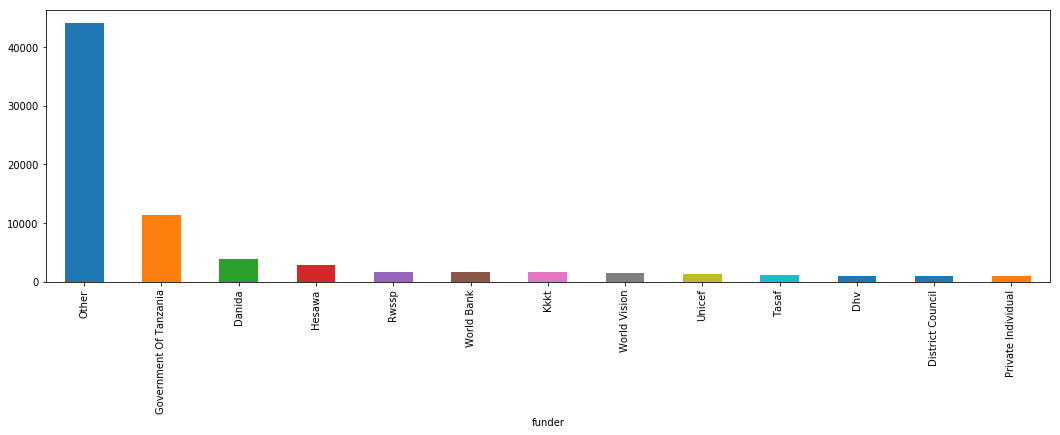

In [97]:
data['funder'] = data['funder'].apply(lambda x: x if x in funder_keep else 'Other')
plt.subplots(figsize=(18,5))
data.groupby('funder').count()['id'].sort_values(ascending=False)[:14].plot.bar()

#### Installer

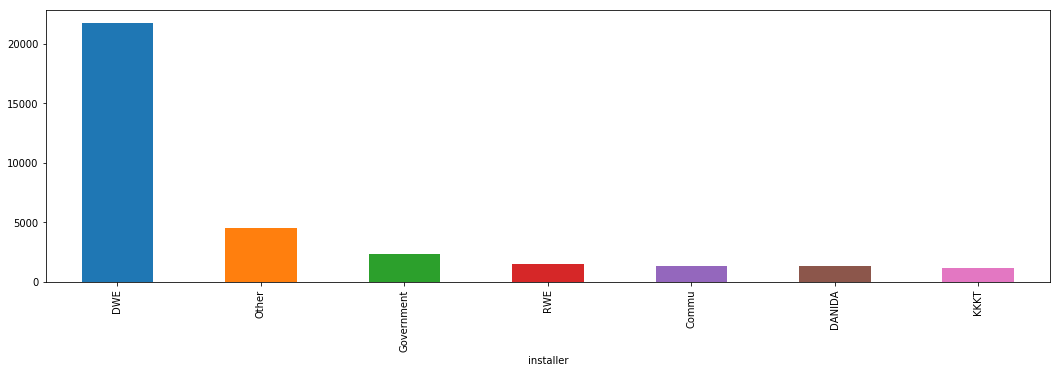

In [98]:
plt.subplots(figsize=(18,5))
data.groupby('installer').count()['id'].sort_values(ascending=False)[:7].plot.bar()
installer_keep = data.groupby('installer').count()['id'].sort_values(ascending=False)[:7].index

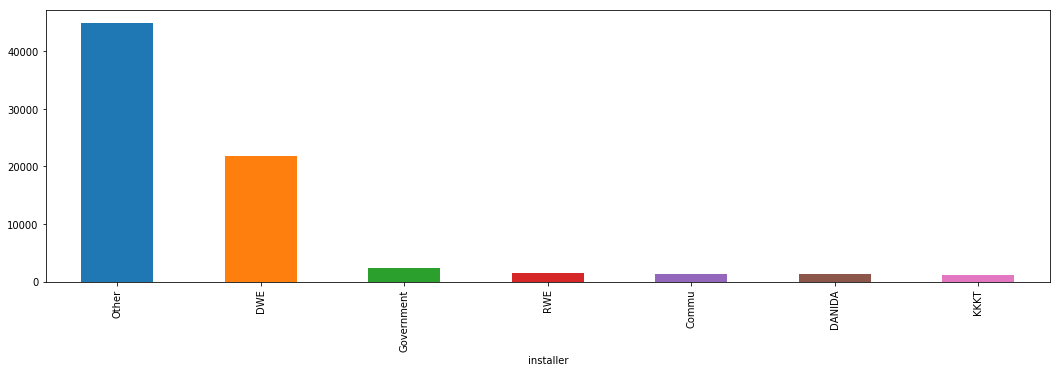

In [99]:
data['installer'] = data['installer'].apply(lambda x: x if x in installer_keep else 'Other')
plt.subplots(figsize=(18,5))
data.groupby('installer').count()['id'].sort_values(ascending=False)[:8].plot.bar()

#### WPT Name

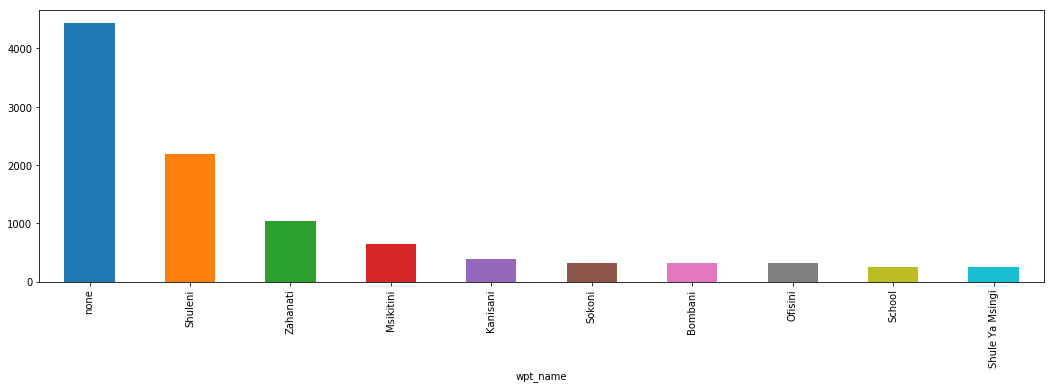

In [100]:
plt.subplots(figsize=(18,5))
data.groupby('wpt_name').count()['id'].sort_values(ascending=False)[:10].plot.bar()
wpt_name_keep = data.groupby('wpt_name').count()['id'].sort_values(ascending=False)[:10].index

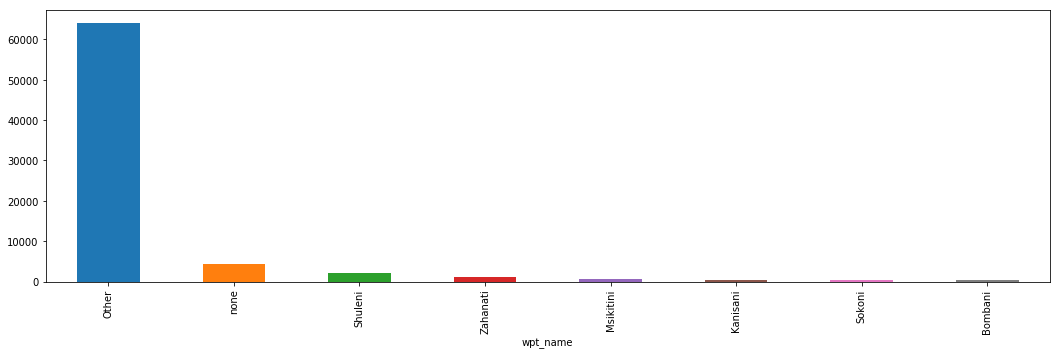

In [101]:
data['wpt_name'] = data['wpt_name'].apply(lambda x: x if x in wpt_name_keep else 'Other')
plt.subplots(figsize=(18,5))
data.groupby('wpt_name').count()['id'].sort_values(ascending=False)[:8].plot.bar()

#### Subvillage

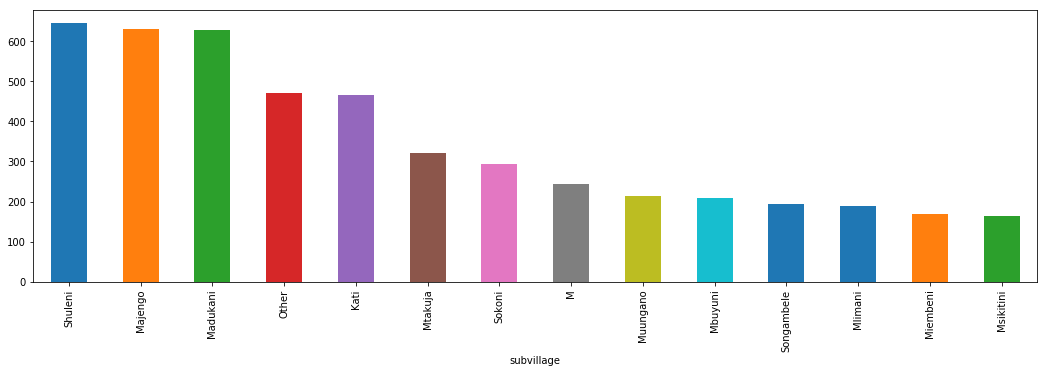

In [102]:
plt.subplots(figsize=(18,5))
data.groupby('subvillage').count()['id'].sort_values(ascending=False)[:14].plot.bar()
subvillage_keep = data.groupby('subvillage').count()['id'].sort_values(ascending=False)[:14].index

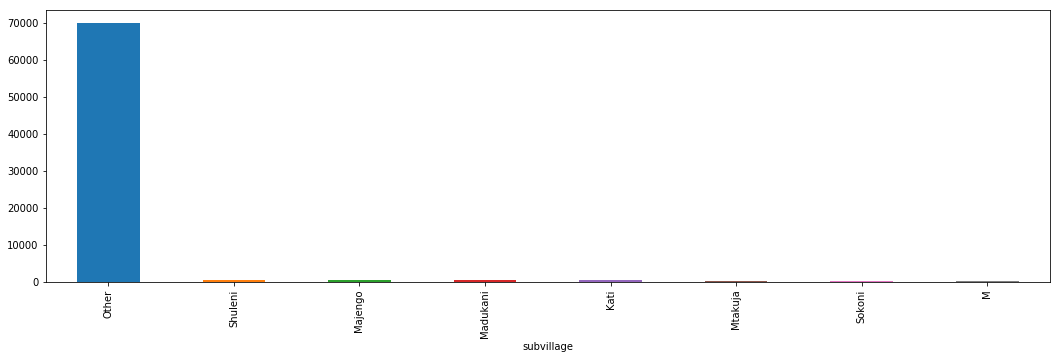

In [103]:
data['subvillage'] = data['subvillage'].apply(lambda x: x if x in subvillage_keep else 'Other')
plt.subplots(figsize=(18,5))
data.groupby('subvillage').count()['id'].sort_values(ascending=False)[:8].plot.bar()

#### Ward

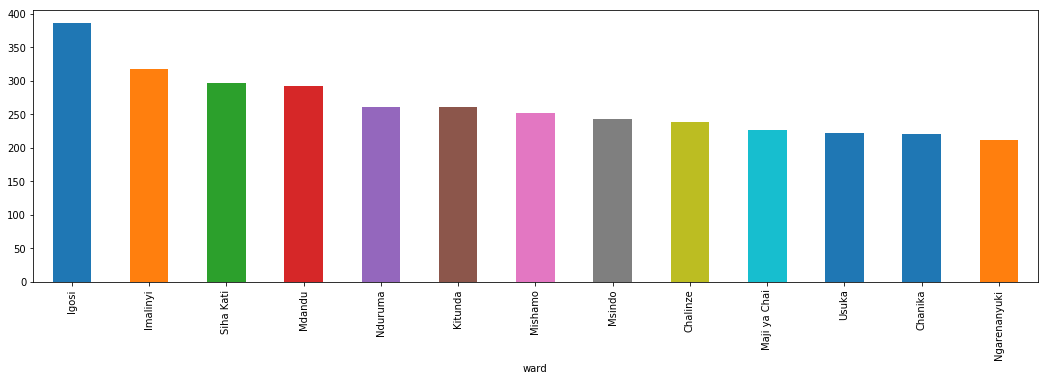

In [104]:
plt.subplots(figsize=(18,5))
data.groupby('ward').count()['id'].sort_values(ascending=False)[:13].plot.bar()
ward_keep = data.groupby('ward').count()['id'].sort_values(ascending=False)[:13].index

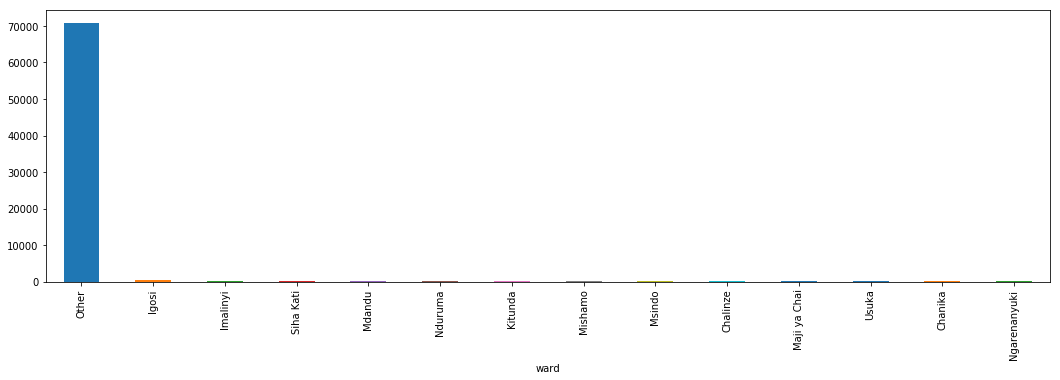

In [105]:
data['ward'] = data['ward'].apply(lambda x: x if x in ward_keep else 'Other')
plt.subplots(figsize=(18,5))
data.groupby('ward').count()['id'].sort_values(ascending=False)[:14].plot.bar()

### Distance to Capital

In emerging countries, there is a common trend that the services are better the closer you are to the capital.  
Tanzania is no exception, so we calculate the distance between the capital and the pump. Theorizing that the pumps closer to the capital are more functioning

In [106]:
import geopy.distance

def distance_to_cap(data):
    lat = data['latitude']
    long = data['longitude']
    location = (lat, long)
    capital = (6.1630, 35.7516)
    distance = geopy.distance.geodesic(capital, location).km
    return(distance)

data['distance_to_capital'] = data.apply(distance_to_cap, axis = 1)

### Final Data Quality Check

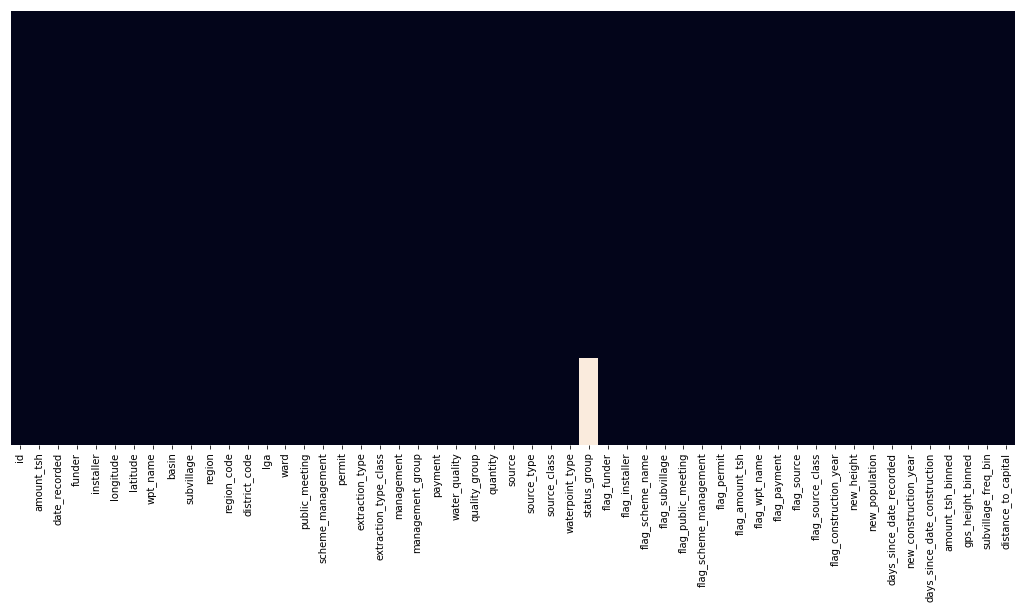

In [107]:
plt.subplots(figsize=(18,8))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

In [108]:
numeric_cols= list(data.select_dtypes(include=np.number).columns.values)

In [109]:
corr = data[numeric_cols].corr()

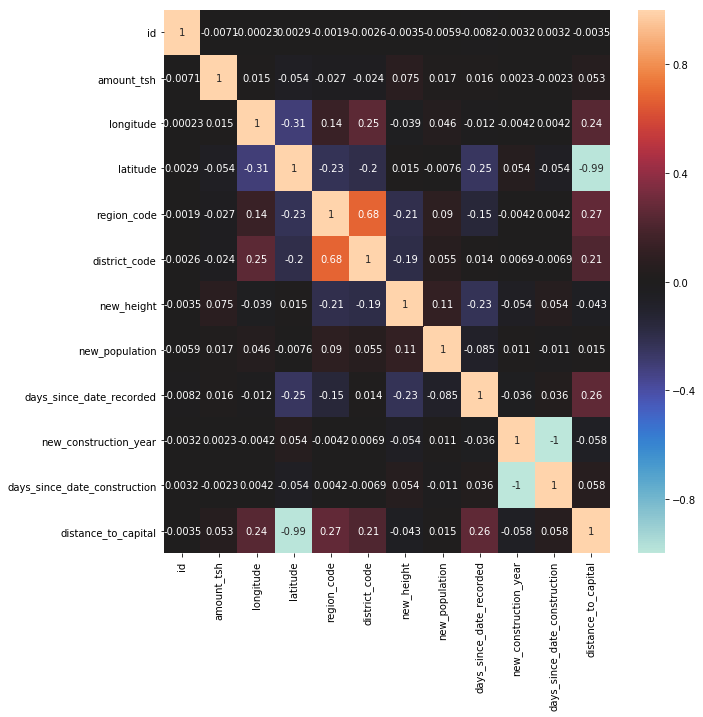

In [110]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr, center=0, square=0, annot=True)

After running the random forest the first time, we saw a lot of unimportant variables. We dropped them in the next cell to see if the model improved  
**Note:** This actually decreased the score so we won't be using this. We comment this line but leave it here for documentation

In [111]:
#data.drop(['latitude', 'longitude', 'lga', 'ward', 'subvillage', 'wpt_name'], axis=1, inplace=True)

### Final Data Prep

We then separate our test set that will be used for score submissions

In [112]:
twp_test = data[data['status_group'].isnull()]
twp_train = data.dropna()

Here we check that they separated OK

In [113]:
len(data) == len(twp_test) + len(twp_train)

True

Here we export the data as a checkpoint of sorts and see if we can use other software to help us

In [114]:
twp_train.to_csv("./Datasets/Clean/twp_train.csv", index=False)
twp_test.to_csv("./Datasets/Clean/twp_test.csv", index=False)

We drop the columns we won't use and separate our label so we can dummyfy our features

In [115]:
final_data = data.drop(['date_recorded'], axis=1)

In [116]:
final_features = final_data.drop('status_group', axis=1)
final_labels = final_data['status_group']

In [117]:
final_dummy_features = pd.get_dummies(final_features)

In [118]:
other_cols = [col for col in final_dummy_features.columns if '_Other' in col]

In [119]:
other_cols

['funder_Other',
 'installer_Other',
 'wpt_name_Other',
 'subvillage_Other',
 'ward_Other',
 'scheme_management_Other']

In [120]:
final_dummy_features.drop(other_cols, axis=1, inplace=True)

In [121]:
end_data = final_dummy_features
end_data['status_group'] = final_labels

In [122]:
len(end_data)

74250

In [123]:
train = end_data.dropna()
test = end_data[end_data['status_group'].isnull()]
test.drop('status_group', axis=1, inplace=True)

C:\Users\dagob\Anaconda3\envs\basicdata\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [124]:
train_ids = train['id']
train.drop('id', axis=1, inplace = True)

test_ids = test['id']
test.drop('id', axis=1, inplace=True)

In [125]:
# Sanity Check

In [126]:
print(len(train_values), len(train))
print(len(test_values), len(test))

59400 59400
14850 14850


In [127]:
train.shape

(59400, 355)

## Modelling

### Data Prep and Libraries

We create a Train Test Split for whenever we can't use Cross Validation, or in case of CV models, to check for generalization

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = train.drop('status_group', axis=1)
y = train['status_group']

In [139]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

### Simple Model - Logistic Regression

It makes sense to use a simple model at the beginning to have as a benchmark

In [487]:
simple_model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)

In [488]:
cv_simple = cross_val_score(simple_model, X, y, cv=3)
cv_simple.mean()

E:\Anaconda3\envs\basicdata\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\basicdata\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\Anaconda3\envs\basicdata\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6581144781144781

We can see that we have convergence warnings and the score is very low. So we proceed to use a more complicated model. Namely a RandomForest

### Random Forests Classifier

**We try different combination of parameters (1 variable "search") to craft our model**

First we check the number of trees

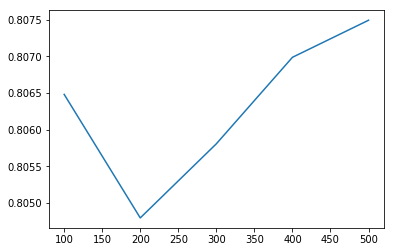

In [490]:
trees = [100, 200, 300, 400, 500]
tree_score = []
for tree in trees:
    model = RandomForestClassifier(n_estimators=int(tree), n_jobs=-1)
    model.fit(X_train, y_train)
    tree_score.append(model.score(X_val, y_val))
plt.plot(trees, tree_score)

Then the max depth

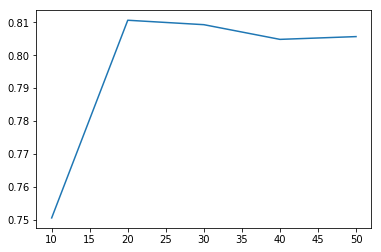

In [491]:
max_depth = [10, 20, 30, 40, 50]
tree_score = []
for depth in max_depth:
    model = RandomForestClassifier(n_estimators=500, max_depth=depth, n_jobs=-1)
    model.fit(X_train, y_train)
    tree_score.append(model.score(X_val, y_val))
plt.plot(max_depth, tree_score)

Then the min_sample_leaf

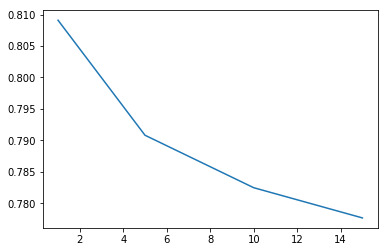

In [492]:
min_leaf = [1, 5, 10, 15]
tree_score = []
for leaf in min_leaf:
    model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_leaf=leaf, n_jobs=-1)
    model.fit(X_train, y_train)
    tree_score.append(model.score(X_val, y_val))
plt.plot(min_leaf, tree_score)

From the information from the past graphs we create a Random Forest Model

#### Final Model (Full)

In [493]:
model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_leaf=1)

In [494]:
cv = cross_val_score(model, X, y, cv=5, n_jobs=-1)
cv.mean()

0.8068518303773292

In [495]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**RF Metrics**

#### Confusion Matrix

In [503]:
print(confusion_matrix(y_val, model.predict(X_val)))

[[6013   74  370]
 [ 523  216  112]
 [1158   36 3378]]


#### Classification Report

In [504]:
print(classification_report(y_val, model.predict(X_val)))

                         precision    recall  f1-score   support

             functional       0.78      0.93      0.85      6457
functional needs repair       0.66      0.25      0.37       851
         non functional       0.88      0.74      0.80      4572

              micro avg       0.81      0.81      0.81     11880
              macro avg       0.77      0.64      0.67     11880
           weighted avg       0.81      0.81      0.80     11880



We can see that we have really good recall for functional pumps and we have really good precision for finding non-functional pumps. Meaning that we can detect and classify non functioning pumps without sending workers to functional ones. The class we have a lot of trouble detecting is the functional needs repair. This could be because of the very low ammount of samples in our data. Maybe with some oversampling this could be better

#### Feature Importance

We plot the feature importance to see which features have the most weight in our model

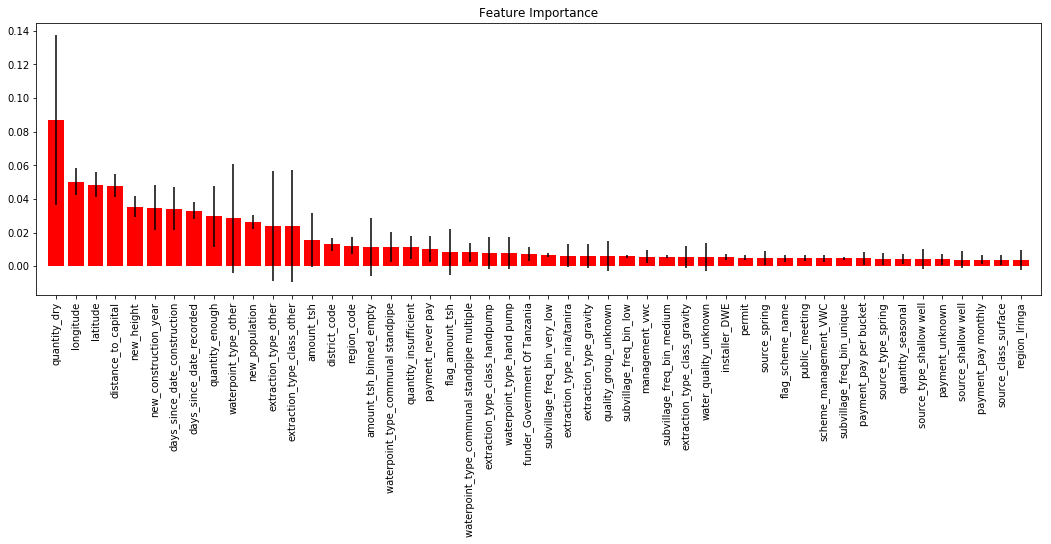

In [506]:
fig, ax = plt.subplots(figsize=(18,5))
skplt.estimators.plot_feature_importances(model, max_num_features=50, feature_names=X.columns, x_tick_rotation=90, ax=ax)

We see a lot of our crafted variables in the top of variable importance.

In [507]:
var_imp = pd.DataFrame(model.feature_importances_.reshape(-1,1), columns=['importance'], index=X.columns)

In [508]:
var_imp.sort_values(by='importance' ,ascending=False).to_csv('./features.csv', index=True)

We now have a Dataframe with our variable importance. We can try to see if we can trim our model a bit in features to increase score

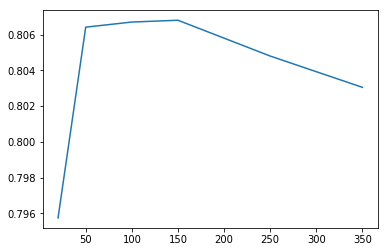

In [511]:
features = [20, 50, 100, 150, 250, 350]
cv_score = []

for feature in features:
    cv_score.append(cross_val_score(model, X[var_imp.sort_values(
        by='importance', ascending=False)[:feature].index], y, cv=3, n_jobs=3).mean())
plt.plot(features, cv_score)

We can see that there isn't much difference in the Cross Validation Score beyond grabbing the top 50 features. Even though the score decreases after 150, looking at the scale, the difference is minimal. 

We will grab a model with all features (already created and a model with 150 features as that's the peak in this graph according to our cross validation 

In [518]:
new_feats = var_imp.sort_values(by='importance' ,ascending=False)[:150].index

We create a new model with only the 150 features

#### Final Model (Trimmed)

**This is so far our best model and best score in the competition**

In [519]:
trimmed_model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_leaf=1)

In [520]:
trimmed_model.fit(X_train[new_feats], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### XGBoost

We also try using XGBoost, although the results of this section took too long to compute and the result was worse than Random Forests. So wthis section will be commented off. But left for documentation purposes

In [521]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb

In [522]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)

In [523]:
data_dmatrix = xgb.DMatrix(data=X,label=label_encoded_y)

In [524]:
params = {
    "min_child_weight": [1, 5, 10],
    "gamma": [0.5, 1, 1.5, 2, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "max_depth": [3, 4, 5],
}

In [525]:
xgb_m = XGBClassifier(
    learning_rate=0.02,
    n_estimators=100,
    objective="multi:softmax",
    verbosity=1,
    
)

In [526]:
folds = 3
param_comb = 50

In [527]:
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)

In [528]:
random_search = RandomizedSearchCV(
    xgb_m,
    param_distributions=params,
    n_iter=param_comb,
    scoring="f1_macro",
    n_jobs=-1,
    cv=skf.split(X, label_encoded_y),
    verbose=3,
    random_state=1001,
)


In [529]:
# random_search.fit(X, label_encoded_y)

In [408]:
# random_search.best_score_

0.5606654760571378

In [411]:
# random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 5,
 'colsample_bytree': 1.0}

### Gradient Booster Classifier (SKlearn)

We also try a simgple gradient boosting classifier to compare results

In [145]:
stages = 500

In [146]:
gb_model = GradientBoostingClassifier(
    n_estimators=stages,
    max_depth=5,
    verbose=1,
    learning_rate=0.3,
)

In [148]:
gb_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       40620.8140           25.10m
         2       36669.1294           25.12m
         3       34210.4702           26.09m
         4       32485.8966           26.42m
         5       31298.7998           27.69m
         6       30356.1280           28.02m
         7       29666.3791           27.72m
         8       29119.7094           27.79m
         9       28662.3737           27.53m
        10       28216.4708           27.02m
        20       25862.2067           22.98m
        30       24497.3007           20.93m
        40       23422.8763           19.59m
        50       22675.0490           18.49m
        60       21969.6303           17.59m
        70       21360.7543           16.88m
        80       20827.5945           16.21m
        90       20259.4282           15.71m
       100       19694.7942           15.33m
       200       15940.6474           11.25m
       300       13332.9738            7.51m
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

Text(0.5,1,'Loss vs Stages')

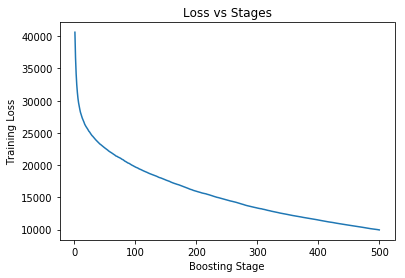

In [149]:
plt.plot(np.arange(1, stages + 1), gb_model.train_score_)
plt.ylabel("Training Loss")
plt.xlabel("Boosting Stage")
plt.title("Loss vs Stages")

We can see here that the more stages the less training loss we have. Gradient Boosted Trees are very robust against overfitting. But the more stages the more it takes to train and predict. So we keep 500 as a cap

In [150]:
gb_model.score(X_val, y_val)

0.8042087542087543

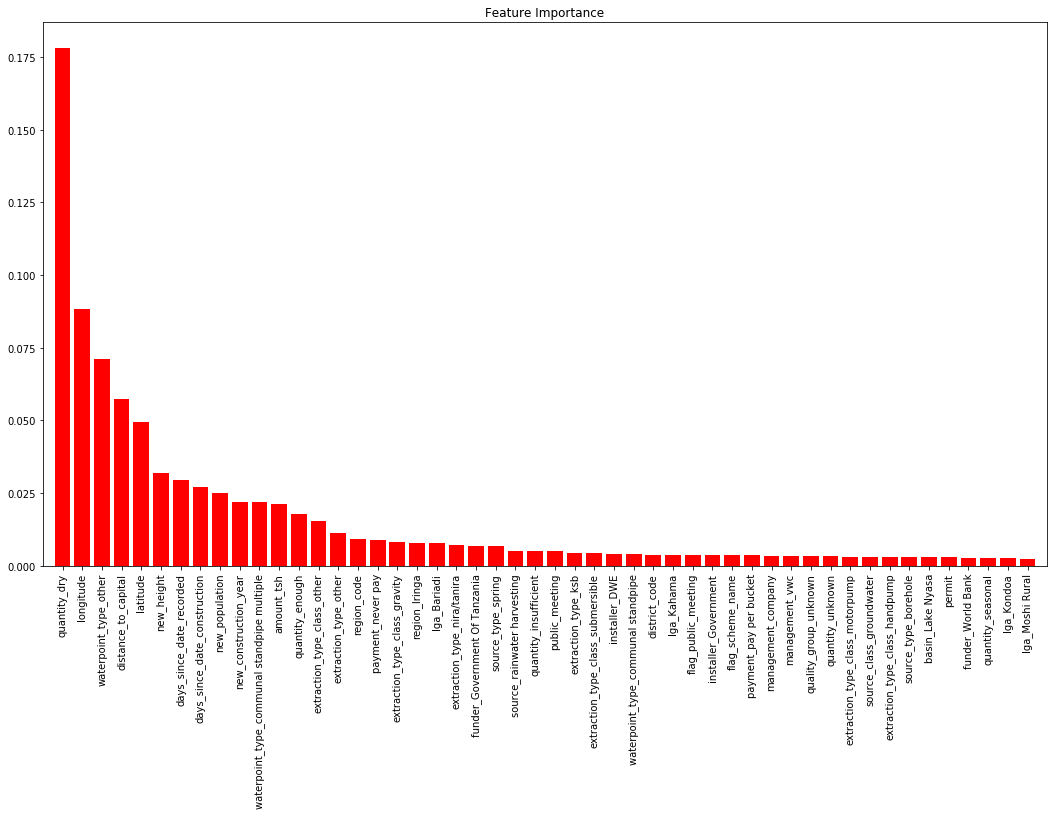

In [151]:
fig, ax = plt.subplots(figsize=(18,10))
skplt.estimators.plot_feature_importances(gb_model, max_num_features=50, feature_names=X.columns, x_tick_rotation=90, ax=ax)

As this model with 500 stages takes 16 minutes to tain, we won't do the loop with ammount of feature importance. As we tried from the previous test. The score actually decreased. So we will use the full model instead.

What we can do as an alternative is run 2 extra models, 1 with the top 14 features (as there is a sharp cutoff in the graph) and one with the top 150 features as it was the number that the random forest classifier gave us 

#### Trimmed Models

In [152]:
var_imp = pd.DataFrame(gb_model.feature_importances_.reshape(-1,1), columns=['importance'], index=X.columns)

In [153]:
new_feats_14 = var_imp.sort_values(by='importance' ,ascending=False)[:14].index
new_feats_150 = var_imp.sort_values(by='importance' ,ascending=False)[:150].index

In [160]:
gb_model_14 = GradientBoostingClassifier(
    n_estimators=stages,
    max_depth=5,
    verbose=1,
    learning_rate=0.3,
)

gb_model_150 = GradientBoostingClassifier(
    n_estimators=stages,
    max_depth=5,
    verbose=1,
    learning_rate=0.3,
)

In [163]:
gb_model_14 = gb_model_14.fit(X_train[new_feats_14], y_train)

      Iter       Train Loss   Remaining Time 
         1       40830.7921            3.34m
         2       37145.4826            3.14m
         3       34903.5437            3.05m
         4       33422.9947            3.01m
         5       32314.3262            3.09m
         6       31526.1634            3.06m
         7       30923.7278            3.14m
         8       30355.3069            3.39m
         9       29890.6055            3.33m
        10       29600.6585            3.26m
        20       27337.5928            2.82m
        30       26186.8559            2.59m
        40       25318.1980            2.43m
        50       24503.0554            2.32m
        60       23807.6442            2.24m
        70       23178.6368            2.17m
        80       22704.0374            2.08m
        90       22140.0090            2.02m
       100       21604.0490            1.95m
       200       17848.0167            1.40m
       300       15187.7183           55.42s
       40

In [164]:
gb_model_14.score(X_val[new_feats_14], y_val)

0.7841750841750842

In [166]:
gb_model_150 = gb_model_150.fit(X_train[new_feats_150], y_train)
gb_model_150.score(X_val[new_feats_150], y_val)

      Iter       Train Loss   Remaining Time 
         1       40622.8251           12.28m
         2       36671.6328           12.21m
         3       34212.8343           12.04m
         4       32494.0423           12.25m
         5       31263.7478           12.56m
         6       30370.7810           12.61m
         7       29578.2097           12.83m
         8       29009.3092           13.09m
         9       28545.0859           13.05m
        10       28192.5277           12.91m
        20       25713.2154           11.81m
        30       24333.4196           10.87m
        40       23364.7352           10.25m
        50       22546.3425            9.80m
        60       21744.5366            9.54m
        70       21132.9090            9.14m
        80       20619.2703            8.75m
        90       20075.2690            8.53m
       100       19518.2157            8.33m
       200       15620.1760            6.26m
       300       12931.7764            4.20m
       40

0.8021043771043771

### ADABoost

ADABoost is a metaclassifier that grabs a base estimator and does subsequent staging boosts using the SAMME.R algorithm

In [562]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [563]:
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100)

In [564]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [565]:
ada_model.score(X_val, y_val)

0.7408249158249158

We can see that our gradient boosted classifier performs beter than this Adaboost(DT) so we will keep using that one and in case it's not better than the Random Forest model, we will used the Trimmed RF model (best score so far)

## Predictions

### Random Forest

#### Full model

In [569]:
rf_sub_f = pd.DataFrame({'id': test_ids.values})
rf_sub_f['status_group'] = model.predict(test)

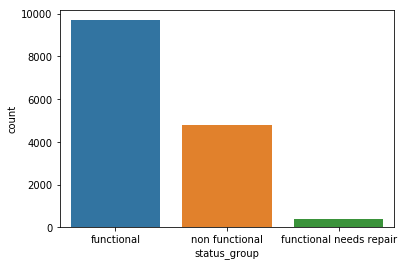

In [570]:
sns.countplot(data=rf_sub_f, x='status_group')

In [571]:
rf_sub_f.to_csv("./Submissions/random_forest_full.csv", index=False)

#### Trimmed Model (less features)

In [572]:
rf_sub_t = pd.DataFrame({'id': test_ids.values})
rf_sub_t['status_group'] = trimmed_model.predict(test[new_feats])

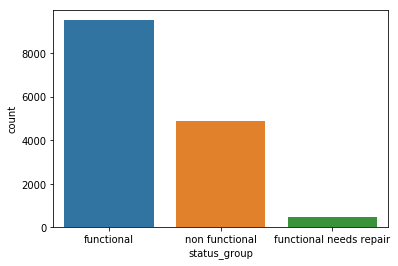

In [573]:
sns.countplot(data=rf_sub_t, x='status_group')

In [574]:
rf_sub_t.to_csv("./Submissions/random_forest_trimmed.csv", index=False)

### Gradient Booster Classifier

In [575]:
gb_sub = pd.DataFrame({'id': test_ids.values})
gb_sub['status_group'] = gb_model.predict(test)

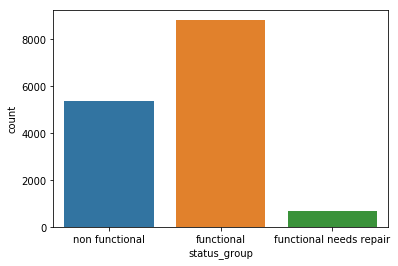

In [576]:
sns.countplot(data=gb_sub, x='status_group')

In [577]:
gb_sub.to_csv("./Submissions/gradient_boosted_full.csv", index=False)

#### Trimmed Models (14 and 150 features)

In [168]:
gb_sub_14 = pd.DataFrame({'id': test_ids.values})
gb_sub_14['status_group'] = gb_model_14.predict(test[new_feats_14])
gb_sub_14.to_csv("./Submissions/gradient_boosted_trim14.csv", index=False)

In [170]:
gb_sub_150 = pd.DataFrame({'id': test_ids.values})
gb_sub_150['status_group'] = gb_model_150.predict(test[new_feats_150])
gb_sub_150.to_csv("./Submissions/gradient_boosted_trim150.csv", index=False)

Scores were actually below the trimmed Random Forest Model

## Conclusions

The best model that we got was 0.8125 using a Random Forest with the 150 most important features once dummified. 

We create several CSVs. But the random_forest_trimmed.csv is the file that gave us the best score. 

We also tried taking variables out of the dataset that seemed unimportant, but they decreased the score slightly. 

**Ideas to try and improve:**  
1) We could try doing this as a 2 stage classification. As functional is about 50% of the data. We can use a model to classify only if it's functional or the rest. And then use a different model to try and classify the two "broken" classes. So it would be a 1 vs rest -> binary classification. This could allow us to use other algorithms that only support binary classification.   
  
2) We could continue trying to remove features that might improve the score. This could be done witha  backwards stepwise regression. The only problem was that the logistic regression was having convergence problems, so we would need to fix that first. Maybe applying the strategy in #1 and making 2 binary classifications would help and let us do it.  
  
3) We could also try and play a bit with Model Stacking. Although considering we did some Boosted Trees and it didn't work, it might not be the best idea.